# SymPy Code Generation Survey

## Background

Earlier in 2022, Sam Brockie was hired as a postdoctoral researcher in Jason K. Moore's lab at TU Delft to [work on SymPy's code generation](https://groups.google.com/u/0/g/sympy/c/YC4PHG5etaA/m/IXRCdcwHBwAJ) as part of the [CZI grant](https://groups.google.com/g/sympy/c/vYsavewGj1w/m/CQKTSznPAgAJ).

For those not familiar with what code generation is, here's a quick explanation:

Oftentimes SymPy users will need to evaluate their symbolic expressions using numeric values. In simple cases, SymPy's `subs` and `evalf` methods can be used to substitute numeric values into symbolic expressions. However, this approach is slow. If your expressions are very large, or the numeric evaluations need to be done many times, then a different approach is required. Code generation is the process of automatically converting symbolic expressions into dedicated computer code for their numeric evaluation. SymPy offers a range of code generation tools supporting the simple creating of numeric Python functions equivalent to a symbolic expression (`lambdify`) and spanning to the creating, compiling, wrapping, and/or importing of efficient numeric C/Fortran/\<other language\> callables. Code generation can also be used to generate other code, such as LaTeX representations of SymPy objects.

More information about [code generation](https://docs.sympy.org/latest/reference/public/codegeneration/index.html) and [numeric computation](https://docs.sympy.org/latest/modules/numeric-computation.html) in SymPy can be found in the docs.

## Methodology

A user survey was conducted between 19th September and 17th October 2022. The approach mirrored that of the SymPy user survey about documentation conducted in February 2022.

The survey consisted of five short questions, predominantly multiple choice with the option to provide additional free-form information, plus to option to feed back anything else. It was conducted using Google Docs survey form and was advertised to SymPy users via the [SymPy mailing list](https://groups.google.com/g/sympy/c/7NOBPopo-9s/m/0lWrz19KAQAJ) and [SymPy Twitter account](https://twitter.com/SymPy/status/1571880390394269696).

The primary purpose of this survey was to gather information about which of, and how, SymPy's codegen features are used by SymPy's users. This information is intended to help inform Sam Brockie's work programme on SymPy's codegen throughout the duration of his work under the CZI grant.

## Summary

We would like to thank everyone who responsed to and shared the survey. A total of 24 responses were received. While we acknowledge that this is a relatively small sample size.

A detailed analysis is provided in the following sections, with a high level summary provided directly below:

1. SymPy's codegen is most used in the scientific research domain.
1. The most common language use case for codegen is doing numeric evaluation from Python.
1. `lambdify` is the most used codegen interface in SymPy.
1. When non-Python code is generated, C is the most common language used.
1. The most requested features/requests were:
    1. Improved documentation.
    1. Code generation of derivatives.


## Analysis

In [65]:
import textwrap

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')  # Set the plot format to SVG for better quality plots

%matplotlib inline

In [52]:
df = pd.read_csv('responses.csv')

In [53]:
timestamp, experience_level_user, experience_level, *args = df.columns

number_responses = len(df)

#### Question 1: What is your experience level with SymPy?

Respondants were allowed to give a free-form response to this question. Responses were categorised during the analysis process into one of five categories based on which was the closest match:

0. No responses
0. Beginner
0. Intermediate
0. Advanced
0. Major contributor

Most respondants reported a moderate level of experience with SymPy.

In [67]:
EXPERIENCE_CATEGORIES_MAPPING = {
    0: "No Response",
    1: "Beginner User",
    2: "Intermediate User",
    3: "Advanced User",
    4: "Major Contributor",
}

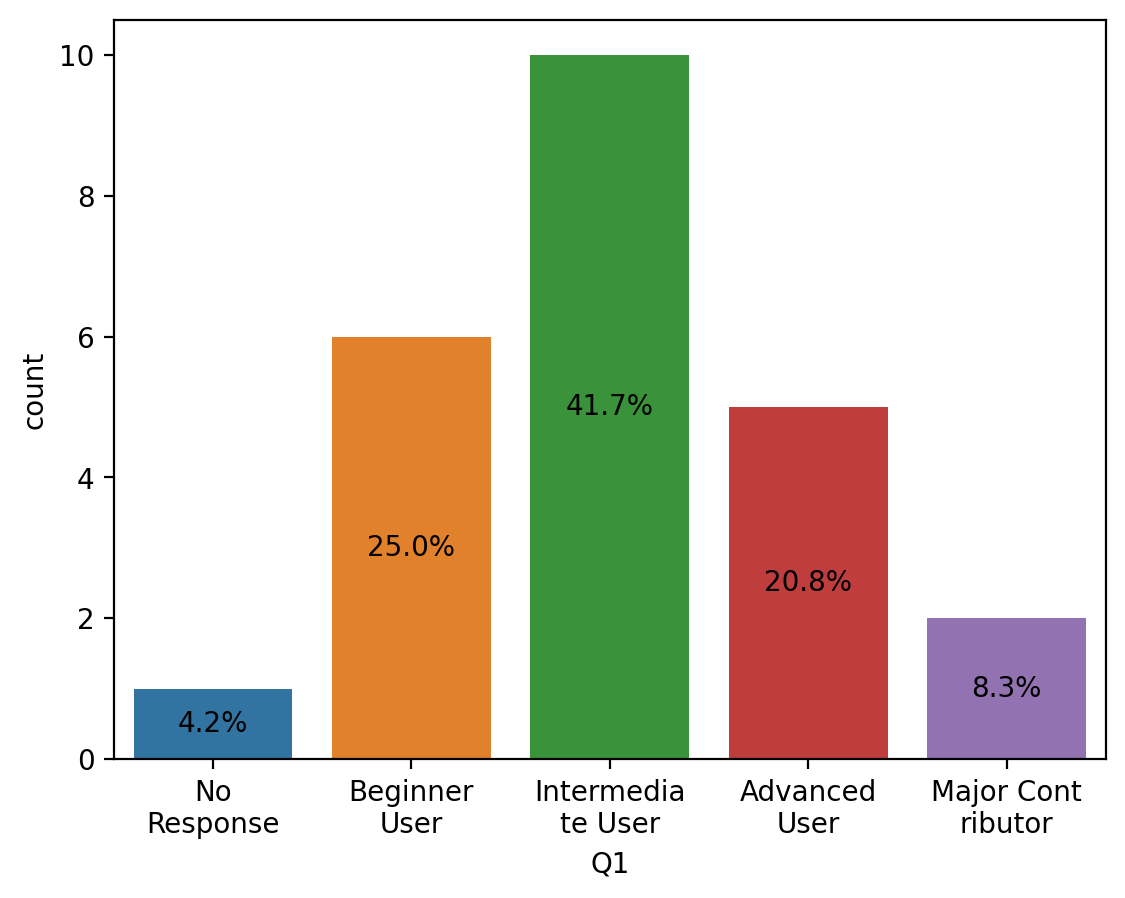

In [68]:
number_no_response = df[experience_level].isna().sum()

experience_categories_no_response = pandas.Series({'0': number_no_response})
experience_categories_response = df[experience_level].dropna().astype(int).value_counts(sort=False).sort_index()
experience_categories = pd.concat([experience_categories_no_response, experience_categories_response])

experience_categories_proportion = (experience_categories / number_responses) * 100
experience_categories_proportion = ["%.1f%%" % proportion for proportion in experience_categories_proportion]

ax = sns.countplot(x=df[experience_level].fillna(0).astype(int).astype("category"))
ax.bar_label(ax.containers[0], experience_categories_proportion, label_type='center')
ax.set_xticklabels(list(EXPERIENCE_CATEGORIES_MAPPING.values()))

max_width = 10

# Split x tick labels across multiple lines
# https://stackoverflow.com/questions/57144682/split-string-xticks-into-multiple-lines-matplotlib
xtl = ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

#### Question 2: What do you use SymPy's code generation for?

#### Question 3: What type of code do you generate using SymPy?

#### Question 4: Which SymPy code generation tools do you use?

#### Question 5: What do we need to improve about SymPy's code generation?

#### Question 6: Are there any other comments you'd like to make?